In [1]:
!sudo apt-get update -y
!sudo apt-get install -y xxd
!pip install pandas numpy matplotlib
%tensorflow_version 2.x
!pip install tensorflow

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import fileinput
from matplotlib.pyplot import figure
from keras.layers import Dense,LSTM,Dropout

In [3]:
#Setting the Seed
SEED = 1707
np.random.seed(SEED)
tf.random.set_seed(SEED)

op_classes = [];

#Reading the CSV Files of the data
for file in os.listdir("/content/"):
    if file.endswith(".csv"):
        op_classes.append(os.path.splitext(file)[0])
        
op_classes.sort()

window_len = 1
n_op_classes = len(op_classes)

#one-hot encoded matrix
encoded_op_classes = np.eye(n_op_classes)

x = []
y = []

# reading each csv file and removing NaN values
for class_index in range(n_op_classes):
  objectClass = op_classes[class_index]
  df = pd.read_csv("/content/" + objectClass + ".csv")
  columns = list(df)
  df = df.dropna()
  df = df.reset_index(drop=True)
   
  # calculate the number of objectClass recordings in the file
  num_recordings = int(df.shape[0] / window_len)
  print(f"\u001b[32;4m{objectClass}\u001b[0m class will be output \u001b[32m{class_index}\u001b[0m of the classifier")
  print(f"{num_recordings} samples captured for training with x {list(df)} \n")

  #tensors
  output = encoded_op_classes[class_index]
  for i in range(num_recordings):
    tensor = []
    row = []
    for c in columns:
      row.append(df[c][i])
    tensor += row
    x.append(tensor)
    y.append(output)

x = np.array(x)
y = np.array(y)

print("Data set parsing and preparation complete.")

num_x = len(x)
randomize = np.arange(num_x)
np.random.shuffle(randomize)

x = x[randomize]
y = y[randomize]

# Split the recordings for training, testing and validation
train = int(0.6 * num_x)
test = int(0.2 * num_x + train)

x_train, x_test, x_validate = np.split(x, [train, test])
y_train, y_test, y_validate = np.split(y, [train, test])

print("Data set randomization and splitting complete.")

Cable Curl_numSamples_20_threshold_0.1_delay_0.2 class will be output 0 of the classifier
1000 samples captured for training with inputs ['acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z'] 

Dumbell bicep curl_numSamples_20_threshold_0.1_delay_0.2 class will be output 1 of the classifier
1000 samples captured for training with inputs ['acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z'] 

Kick Back_numSamples_20_threshold_0.1_delay_0.2 class will be output 2 of the classifier
1000 samples captured for training with inputs ['acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z'] 

Lat Pulldown_numSamples_20_threshold_0.1_delay_0.2 class will be output 3 of the classifier
1000 samples captured for training with inputs ['acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z'] 

Pec Fly_numSamples_20_threshold_0.1_delay_0.2 class will be output 4 of the classifier
1000 samples captured for training with inputs ['acc.x', 'acc.y', 'acc.z', 'gyro.x', 'gyro.y', 'gyro.z'] 

Reverse P

In [4]:
x_train.shape

(3600, 6)

In [5]:
y_train.shape

(3600, 6)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_validate = np.reshape(x_validate, (x_validate.shape[0],x_validate.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [7]:
x_train.shape

(3600, 6, 1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [9]:
rnn = Sequential()
rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 25, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 10))
rnn.add(Dropout(0.2))
rnn.add(Dense(units = 6,activation='softmax'))
rnn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = rnn.fit(x_train, y_train, epochs=500, batch_size=4, validation_data=(x_validate, y_validate))

Epoch 1/500
900/900 [==============================] - 28s 21ms/step - loss: 0.1068 - accuracy: 0.4500 - val_loss: 0.0814 - val_accuracy: 0.6025
Epoch 2/500
900/900 [==============================] - 8s 9ms/step - loss: 0.0801 - accuracy: 0.6236 - val_loss: 0.0725 - val_accuracy: 0.6708
Epoch 3/500
900/900 [==============================] - 8s 9ms/step - loss: 0.0768 - accuracy: 0.6528 - val_loss: 0.0723 - val_accuracy: 0.6717
Epoch 4/500
900/900 [==============================] - 8s 9ms/step - loss: 0.0697 - accuracy: 0.6928 - val_loss: 0.0640 - val_accuracy: 0.7142
Epoch 5/500
900/900 [==============================] - 8s 9ms/step - loss: 0.0670 - accuracy: 0.7039 - val_loss: 0.0618 - val_accuracy: 0.7308
Epoch 6/500
900/900 [==============================] - 8s 9ms/step - loss: 0.0631 - accuracy: 0.7333 - val_loss: 0.0556 - val_accuracy: 0.7667
Epoch 7/500
900/900 [==============================] - 8s 9ms/step - loss: 0.0599 - accuracy: 0.7511 - val_loss: 0.0501 - val_accuracy: 0.78

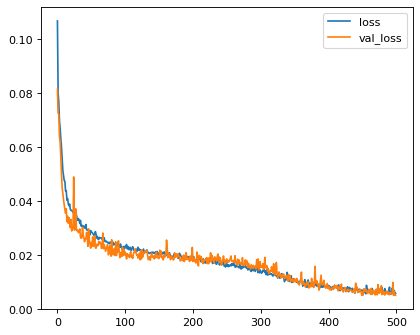

In [10]:
figure(figsize=(6, 5), dpi=80)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

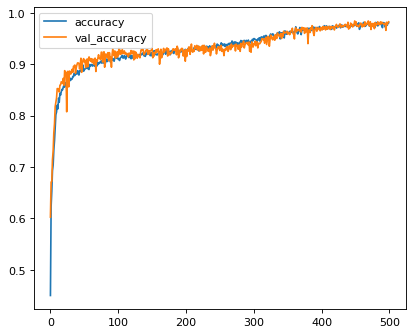

In [11]:
figure(figsize=(6, 5), dpi=80)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [12]:
pred = rnn.predict(x_test)

print("predictions =\n", np.round(pred[2]))
print("actual =\n", y_test[2])

correct_count = 0

for i in range(len(pred)):
  label = np.argmax(pred[i])
  if y_test[i][label] == 1:
    correct_count += 1

print("No. of samples correctly classified:",correct_count)
print("Accuracy of the Model:",correct_count*100/len(y_test))

predictions =
 [1. 0. 0. 0. 0. 0.]
actual =
 [1. 0. 0. 0. 0. 0.]
No. of samples correctly classified: 1175
Accuracy of the Model: 97.91666666666667


In [26]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(rnn)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /tmp/tmps3c5u01n/assets


INFO:tensorflow:Assets written to: /tmp/tmps3c5u01n/assets


Model is 91864 bytes


In [28]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 566,530 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


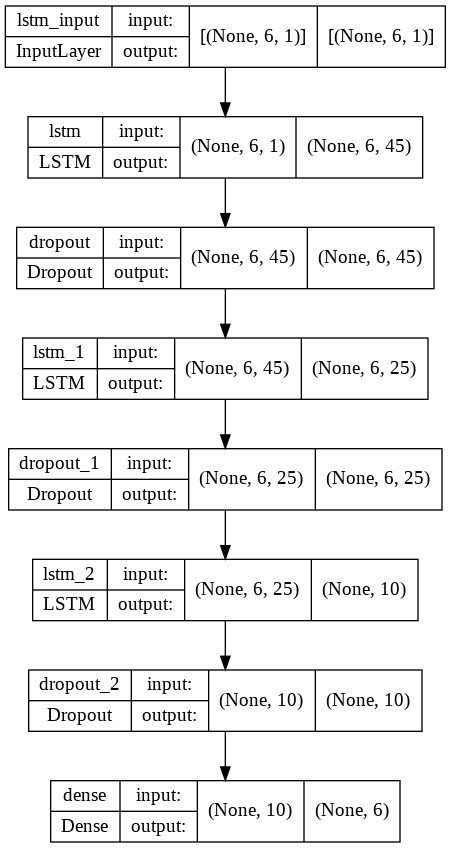

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(rnn, to_file='model.png', show_shapes=True, show_layer_names=True)

In [30]:
!pip install ann_visualizer
!pip install graphviz

In [32]:
from ann_visualizer.visualize import ann_viz;
ann_viz(rnn, title="Neural Network Model")

NameError: ignored